# Employee Attrition Prediction using machine learning
The employees are the backbone of the organization. The success or failure of the organization depends on the employees working in the organization. Organizations must deal with problems when trained, skilled and experienced employees leave the organization for better opportunities.

Employee Attrition is minimized in any organization where employees quit. Employees are valuable assets to any organization. It is necessary to find out if the employees are dissatisfied or if there are other reasons to leave their jobs.

Nowadays, to get better opportunities, employees are eager to move from one organization to another. But if they quit their jobs unexpectedly, it could lead to a huge loss for the organization. A new employee will take money and time, and newly hired employees will take time to make the organization in question profitable.

Retaining skilled and hardworking employees is one of the most important challenges that many organizations face. Therefore, by improving employee satisfaction and providing a desirable work environment, we can definitely reduce this problem significantly.

## Importing libraries and loading the dataset

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Import statements required for Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

In [9]:
df = pd.read_csv('Employee_Attrition.csv')
pd.set_option('display.max_columns', 35)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Data Overview

In [8]:
df.shape

(1470, 35)

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Data visualization and analysis

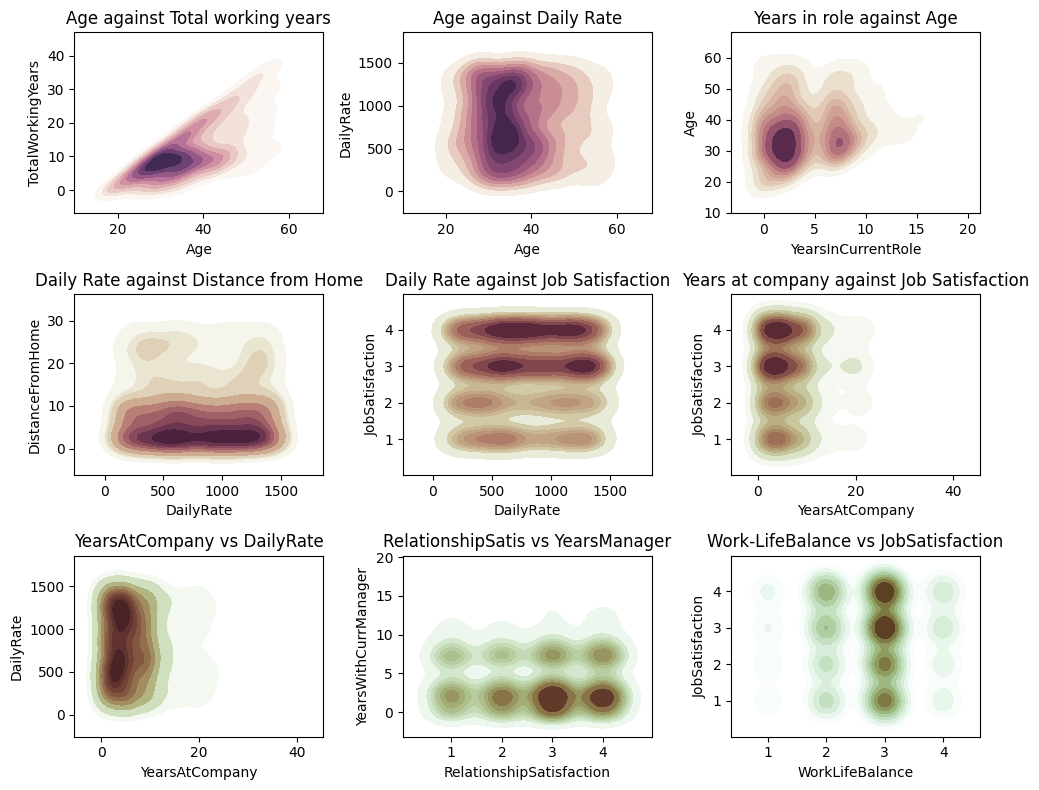

In [17]:
# Define the combinations of columns and titles
column_pairs = [
    ('Age', 'TotalWorkingYears', 'Age against Total working years'),
    ('Age', 'DailyRate', 'Age against Daily Rate'),
    ('YearsInCurrentRole', 'Age', 'Years in role against Age'),
    ('DailyRate', 'DistanceFromHome', 'Daily Rate against Distance from Home'),
    ('DailyRate', 'JobSatisfaction', 'Daily Rate against Job Satisfaction'),
    ('YearsAtCompany', 'JobSatisfaction', 'Years at company against Job Satisfaction'),
    ('YearsAtCompany', 'DailyRate', 'YearsAtCompany vs DailyRate'),
    ('RelationshipSatisfaction', 'YearsWithCurrManager', 'RelationshipSatis vs YearsManager'),
    ('WorkLifeBalance', 'JobSatisfaction', 'Work-LifeBalance vs JobSatisfaction')
]

# Create subplots
f, axes = plt.subplots(3, 3, figsize=(10, 8), sharex=False, sharey=False)

# Loop through column pairs and plot
for i, (x_col, y_col, title) in enumerate(column_pairs):
    row_index, col_index = divmod(i, 3)
    cmap = sns.cubehelix_palette(start=i / len(column_pairs), light=1, as_cmap=True)
    sns.kdeplot(data=df, x=x_col, y=y_col, cmap=cmap, fill=True, ax=axes[row_index, col_index])
    axes[row_index, col_index].set(title=title)

f.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

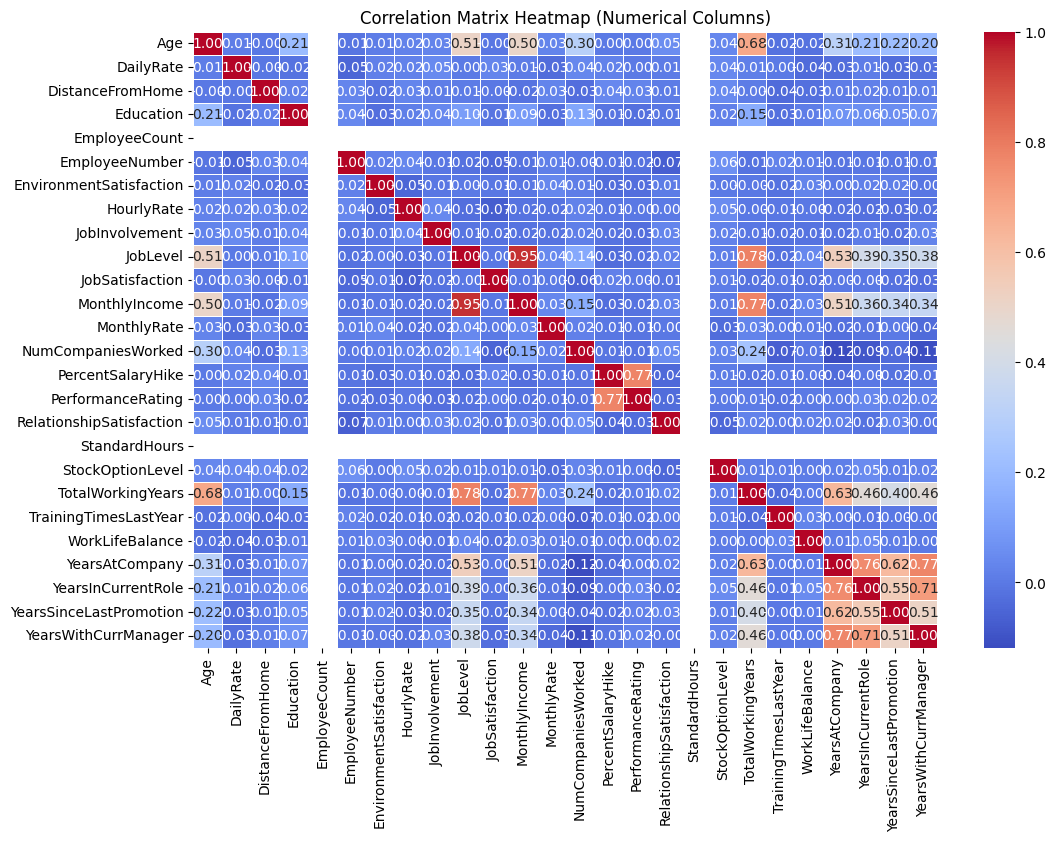

In [25]:
plt.figure(figsize=(12,8))

numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Columns)")
plt.show()

From the correlation chart, we can see that a lot of our columns appear to be poorly correlated with each other. In general, when building a predictive model, it would be better to train a model with features that are not highly correlated with each other so that we do not need to deal with redundant features. If there are a large number of correlated features, we may apply a technique such as principal component analysis (PCA) to reduce the feature space.

## Features engineering

In [29]:
# Separate categorical and numerical columns
categorical = []
numerical = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)

# Store the categorical columns in a separate DataFrame
attrition_cat = df[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column
attrition_cat = pd.get_dummies(attrition_cat)

# Store the numerical columns in a separate DataFrame
attrition_num = df[numerical]

# Concatenate the numerical and one-hot encoded categorical columns
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

# Define a mapping for the target variable
target_map = {'Yes': 1, 'No': 0}

# Use the pandas apply method to numerically encode the target variable
target = df["Attrition"].apply(lambda x: target_map[x])

## Training the data and making predictions

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and
X_train, X_test, y_train, y_test = train_test_split(attrition_final, target, train_size=0.80, random_state=0)

# Create an instance of StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# Use the split method to generate train and test indices
for train_index, test_index in sss.split(attrition_final, target):
    X_train, X_test = attrition_final.iloc[train_index], attrition_final.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

In [39]:
# Create an instance of SMOTE
oversampler = SMOTE(random_state=0) 
# SMOTE is an oversampling technique used to balance the class distribution by generating synthetic examples of the minority class.

# fit the SMOTE algorithm to the training data, and generate resampled data.
#  After this step, the training data should have a balanced class distribution.
smote_train, smote_target = oversampler.fit_resample(X_train, y_train)

seed = 0  # We set our random seed to zero for reproducibility

# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'random_state': seed,
    'verbose': 0
}

rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
rf_predictions = rf.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, rf_predictions)))
print("=" * 80)
print(classification_report(y_test, rf_predictions))

Accuracy score: 0.8605442176870748
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.64      0.30      0.41        47

    accuracy                           0.86       294
   macro avg       0.76      0.63      0.66       294
weighted avg       0.84      0.86      0.84       294



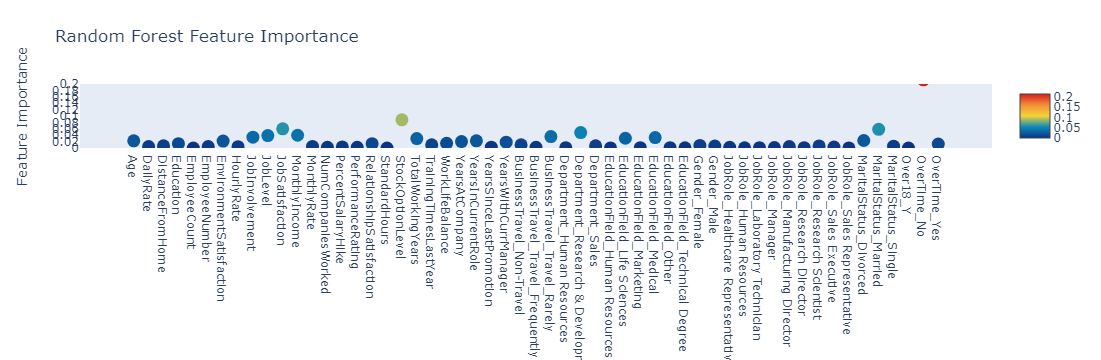

In [51]:
import plotly.graph_objs as go
import plotly.offline as py

# Create a scatter plot for feature importances
trace = go.Scatter(
    y=rf.feature_importances_,
    x=attrition_final.columns,
    mode='markers',
    marker=dict(
        size=13,
        color=rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text=attrition_final.columns
)

data = [trace]

# Calculate the y-axis range and interval size
y_min = 0  # Minimum value for the y-axis
y_max = 0.2  # Maximum value for the y-axis
num_intervals = 10  # Number of intervals
interval_size = (y_max - y_min) / num_intervals  # Calculate the interval size

# Define the layout with a custom y-axis range
layout = go.Layout(
    autosize=True,
    title='Random Forest Feature Importance',
    hovermode='closest',
    xaxis=dict(
        ticklen=5,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title='Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen=5,
        gridwidth=2,
        range=[y_min, y_max],  # Set the y-axis range
        tickvals=[i * interval_size for i in range(num_intervals + 1)]  # Set tick values
    ),
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)

# Plot the figure
py.iplot(fig, filename='scatter2010')